<h1 id="weather_station_clustering" align="center"> Clustering Ghanaian households based on their expenditure patterns</h1>
<hr>

### 1.1 Initial Data Exploration

In this notebook, we will perform various data explorations to access the quality of the data. The data is in different csv files, and hence we will explore them individually. 

#### Demographics data

In [1]:
import pandas as pd

In [2]:
basic_info = pd.read_csv('BASIC_INFO.csv')

In [3]:
basic_info.head(3)

,country,region,hid,clust,nh,loc2,loc5,loc7,survemo,surveyr,eqsc,hhsize,WTA_S,WTA_S_HHSIZE,rururb
0,Ghana,Western,70001/01,70001.0,1.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,0.76,1.0,482.56895,482.5689,Urban
1,Ghana,Western,70001/02,70001.0,2.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,5.59,7.0,482.56895,3377.9830,Urban
2,Ghana,Western,70001/03,70001.0,3.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,1.00,1.0,482.56895,482.5689,Urban


Since we donot need several of these columns, we will drop them, and keep the relevant ones - region, hid (household index), and rururb (rural or urban household)

In [4]:
basic_info2 = basic_info[['hid','region','rururb']]

In [5]:
basic_info2.head(3)

,hid,region,rururb
0,70001/01,Western,Urban
1,70001/02,Western,Urban
2,70001/03,Western,Urban


Let's check whether the data is fairly distributed across the 10 regions of Ghana

In [6]:
%matplotlib

Using matplotlib backend: agg


Ashanti          1735
Northern         1409
Greater Accra    1398
Eastern          1395
Upper East       1371
Upper West       1367
Volta            1367
Western          1331
Brong Ahafo      1318
Central          1318
Name: region, dtype: int64


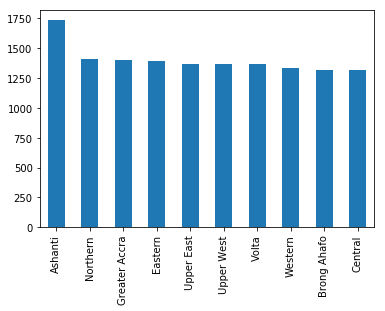

In [7]:
print(basic_info2.region.value_counts())
basic_info2.region.value_counts().plot(kind='bar')

As we can see from above, the data appears fairly istributed across the 10 regions.  This suggest that bias with respect to region is not a problem in the data set

Also, let's check if the data is fairly distributed across rural and urban households.

Rural    7991
Urban    6018
Name: rururb, dtype: int64


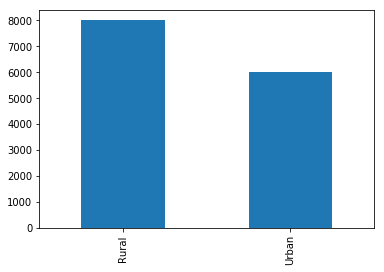

In [8]:
print(basic_info2.rururb.value_counts())
basic_info2.rururb.value_counts().plot(kind='bar')

The figure above indicates that there is less bias (if any) in the dataset with respect to rural and urban households. 

In [12]:
a = ((7991-6018)/7991)*100
print('rural households is just about', a, 'percent more than urban households in the data set')

rural households is just about 24.69027656113127 percent more than urban households in the data set


#### Food expenditure

In [13]:
exp_food = pd.read_csv('01_GHA_EXPFOOD.csv')

Missing values

In [15]:
exp_food.isna().sum()

hid        0
TOTFOOD    0
dtype: int64

This data has no missing values

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08e79ea90>]],
      dtype=object)

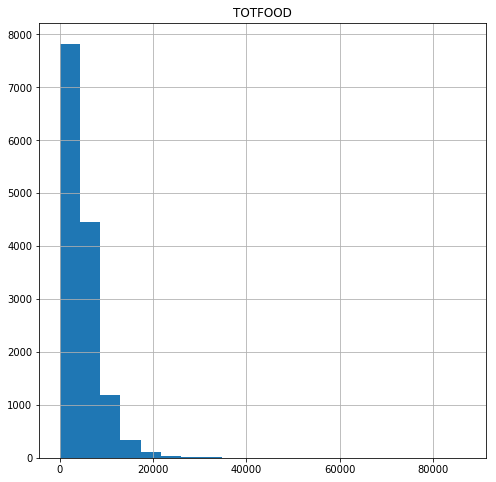

In [17]:
exp_food.hist(figsize=(8,8), bins = 20)

We see from the histogram above that much of the data is below 20000. Meanwhile the highest annual expenditure is about 80000. This suggest the presence of outliers in the data. As such, k-means algorithm might not be a good fit since it is not robust to outliers. 

Basic statistics

In [20]:
exp_food.describe()

,TOTFOOD
count,14009.000000
mean,4882.269339
std,4122.320888
min,0.000000
25%,2290.739990
50%,3902.580078
75%,6266.320312
max,86967.820312


Although minimum expenditure on food is zero, it may be true given that some farmers in rural areas hardly buy food and rather eats from their farm produce.

Let's check how food expenditure is distributed among rural and urban households. So we will merge the data with the basic info data

In [23]:
b1 = pd.merge(basic_info2, exp_food, how='inner', on='hid') # we are merging on the household id.


            TOTFOOD
rururb             
Rural   4163.996617
Urban   5836.027617


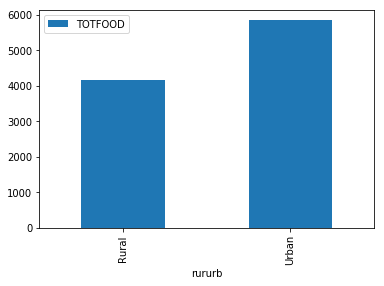

In [30]:
print(b1.groupby('rururb').mean())
b1.groupby('rururb').mean().plot(kind='bar')

The plot above makes sense since urban households are relatively richer tha Rural households. 

We also expect food expenditure to be high in the top two biggest cities - Kumasi and Accra

                   TOTFOOD
region                    
Ashanti        5363.080691
Brong Ahafo    4836.967585
Central        5843.392550
Eastern        5158.412023
Greater Accra  7567.246444
Northern       4654.369198
Upper East     3358.173942
Upper West     2501.838354
Volta          4328.312852
Western        5063.994617


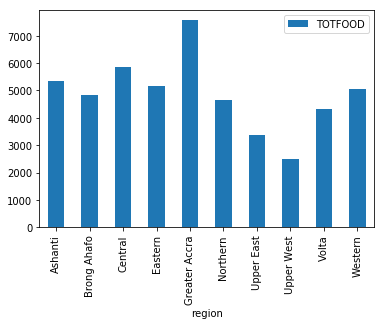

In [33]:
print(b1.groupby('region').mean())
b1.groupby('region').mean().plot(kind='bar')

#### Alcohol expenditure

Import data

In [35]:
exp_alch = pd.read_csv('02_GHA_EXPALCH.csv')

Checking missing values

In [36]:
exp_alch.isna().sum()

hid        0
TOTALCH    0
dtype: int64

cheking the distribution of alcohol expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08e309d30>]],
      dtype=object)

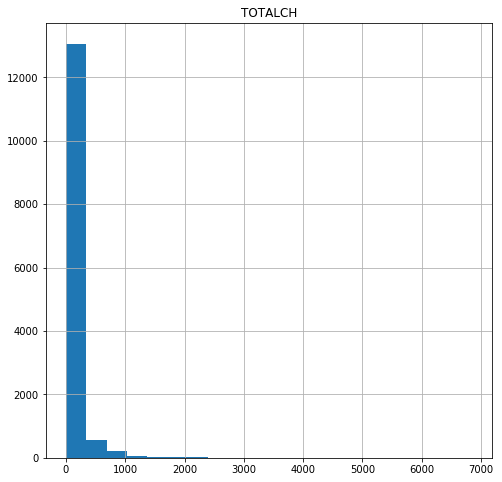

In [37]:
exp_alch.hist(figsize=(8,8), bins = 20)

The distribution above indicates that outliers might be present in the data, and of course we will use an outlier-robust clustering alogorithm. As can be seen below, the mean is far below the maximum value. 

In [38]:
exp_alch.describe()

,TOTALCH
count,14009.000000
mean,74.552329
std,258.692153
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6847.399902


In [39]:
b2 = pd.merge(basic_info2, exp_alch, how='inner', on='hid') # we are merging on the household id.


          TOTALCH
rururb           
Rural   90.001923
Urban   54.037589


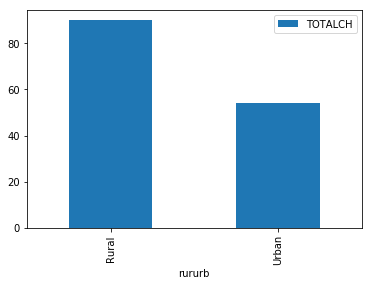

In [40]:
print(b2.groupby('rururb').mean())
b2.groupby('rururb').mean().plot(kind='bar')

In the plot above we see that mean alcohol expenditure in higher for rural households. In the clustering analysis, however, we would see which household type (irrespective of rural or urban) has a higher alcohol expenditure. We will answers to this possible anomaly in later stages of this project   

                  TOTALCH
region                   
Ashanti         34.453475
Brong Ahafo     34.206980
Central         50.147898
Eastern         64.690210
Greater Accra   93.442088
Northern       131.330781
Upper East      83.079431
Upper West     156.428106
Volta           72.301720
Western         30.767498


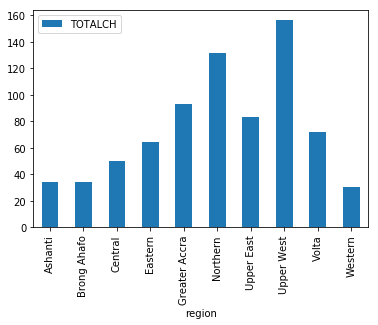

In [41]:
print(b2.groupby('region').mean())
b2.groupby('region').mean().plot(kind='bar')

As, we can see from the graph above, regions in the northern part of Ghana (northen, upper east and upper west spends more on alcohol on the average). This may explain the initial plot since these regions are relatively poorer compared to the southern regions

#### Clothing expenditure

In [43]:
exp_cl = pd.read_csv('03_GHA_EXPCLTH.csv')

checking missing values

In [51]:
exp_cl.isna().sum()

hid        0
TOTCLTH    0
dtype: int64

checking the distribution of clothing expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08e129828>]],
      dtype=object)

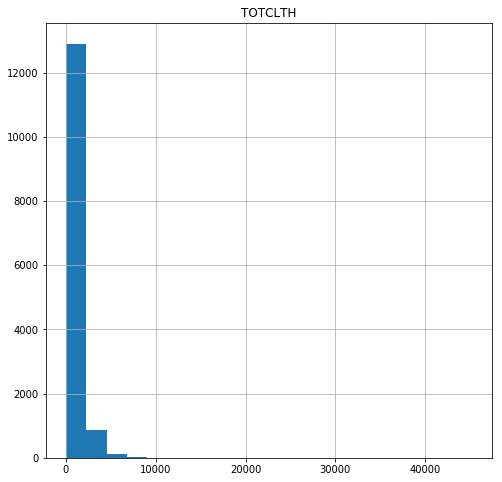

In [45]:
exp_cl.hist(figsize=(8,8), bins = 20)

Basic Statistics

In [46]:
exp_cl.describe()

,TOTCLTH
count,13939.000000
mean,891.899609
std,1141.508978
min,0.000000
25%,265.250000
50%,588.000000
75%,1138.000000
max,45205.000000


In [47]:
b3 = pd.merge(basic_info2, exp_cl, how='inner', on='hid') # we are merging on the household id.

Average clothing expenditure among rural and urban households 

            TOTCLTH
rururb             
Rural    711.544083
Urban   1133.139869


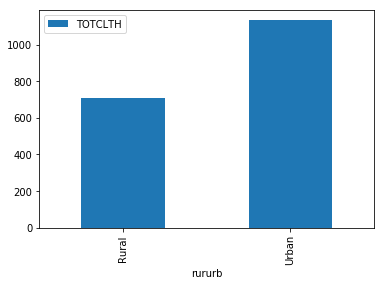

In [48]:
print(b3.groupby('rururb').mean())
b3.groupby('rururb').mean().plot(kind='bar')

Average clothing expenditure by region

                   TOTCLTH
region                    
Ashanti        1028.745992
Brong Ahafo     776.067504
Central        1130.075701
Eastern         998.493466
Greater Accra  1225.630033
Northern        914.849217
Upper East      793.186944
Upper West      405.302660
Volta           685.542570
Western         924.194464


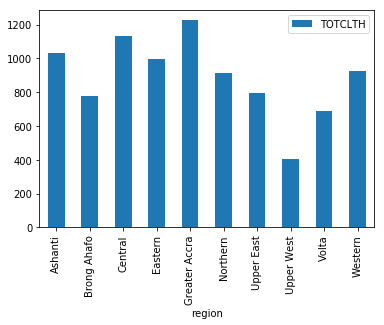

In [49]:
print(b3.groupby('region').mean())
b3.groupby('region').mean().plot(kind='bar')

#### Housing expenditure

In [52]:
exp_hs = pd.read_csv('04_GHA_EXPHOUS.csv')

checking missing

In [53]:
exp_hs.isna().sum()

hid        0
TOTHOUS    0
dtype: int64

Checking the distribution of housing expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08e07ca20>]],
      dtype=object)

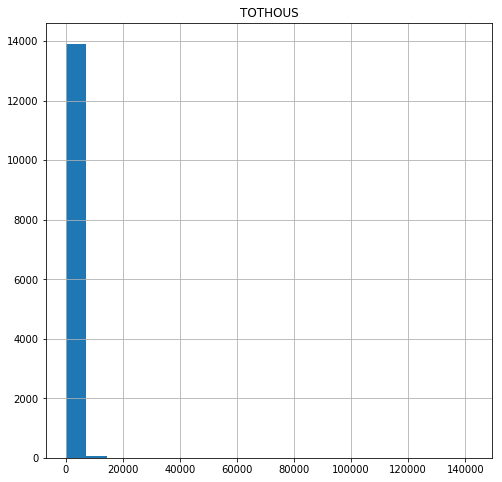

In [54]:
exp_hs.hist(figsize=(8,8), bins = 20)

Basic Statistics of housing expenditure

In [55]:
exp_hs.describe()

,TOTHOUS
count,14009.000000
mean,986.570278
std,2230.372652
min,0.000000
25%,120.000000
50%,525.599976
75%,1285.942871
max,142304.281250


In [56]:
b4 = pd.merge(basic_info2, exp_hs, how='inner', on='hid') # we are merging on the household id.

Average housing expenditure across rural and urban households

            TOTHOUS
rururb             
Rural    492.307560
Urban   1642.876921


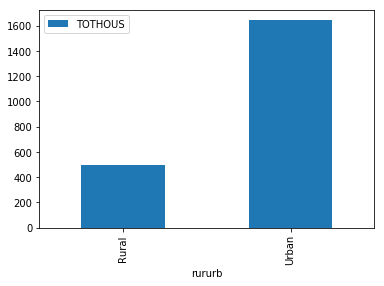

In [57]:
print(b4.groupby('rururb').mean())
b4.groupby('rururb').mean().plot(kind='bar')

In [ ]:
Average housing expenditure by region

                   TOTHOUS
region                    
Ashanti        1353.639840
Brong Ahafo     739.608196
Central        1128.106267
Eastern         800.742586
Greater Accra  2267.845096
Northern        605.461587
Upper East      451.606756
Upper West      549.124553
Volta           826.332674
Western        1029.803621


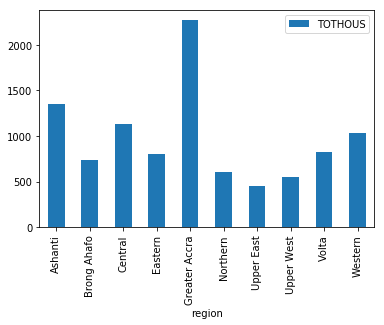

In [58]:
print(b4.groupby('region').mean())
b4.groupby('region').mean().plot(kind='bar')

Expenditure on Furniture

In [59]:
exp_fur = pd.read_csv('05_GHA_EXPFURN.csv')

checking missing values

In [60]:
exp_fur.isna().sum()

hid        0
TOTFURN    0
dtype: int64

Distribution of furniture expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08dc15828>]],
      dtype=object)

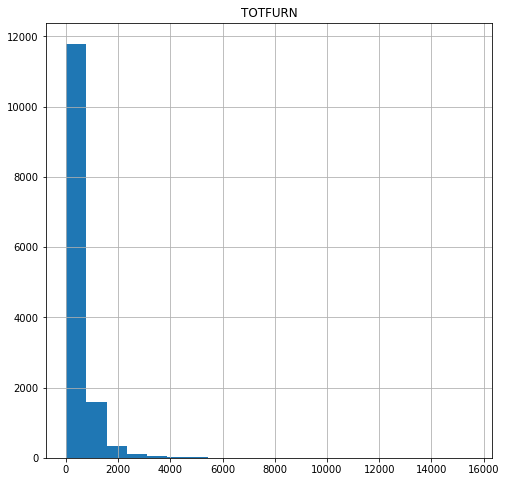

In [62]:
exp_fur.hist(figsize=(8,8), bins = 20)

Basic statistics

In [63]:
exp_fur.describe()

,TOTFURN
count,13945.000000
mean,463.612543
std,638.888771
min,0.000000
25%,141.800003
50%,297.100006
75%,573.000000
max,15550.000000


In [64]:
b5 = pd.merge(basic_info2, exp_fur, how='inner', on='hid') # we are merging on the household id.

Average furnishing expenditure across rural and urban households

           TOTFURN
rururb            
Rural   366.055720
Urban   594.047994


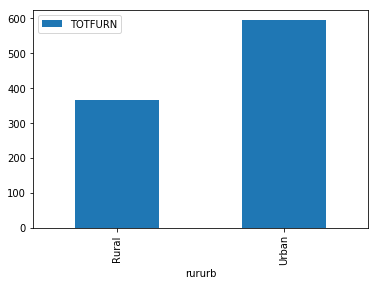

In [65]:
print(b5.groupby('rururb').mean())
b5.groupby('rururb').mean().plot(kind='bar')

Average furnisher expenditure by region

                  TOTFURN
region                   
Ashanti        450.985496
Brong Ahafo    405.204791
Central        613.168003
Eastern        465.616702
Greater Accra  767.571606
Northern       456.140967
Upper East     368.949730
Upper West     274.681932
Volta          388.609646
Western        448.599006


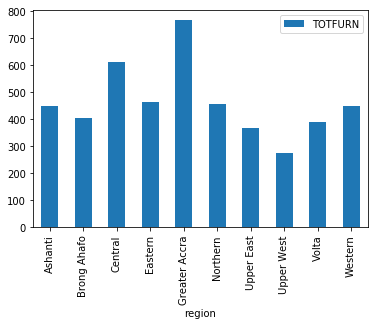

In [66]:
print(b5.groupby('region').mean())
b5.groupby('region').mean().plot(kind='bar')

#### Health expenditure

In [67]:
exp_hl = pd.read_csv('06_GHA_EXPHLTH.csv')

checking missing values

In [68]:

exp_hl.isna().sum()

hid        0
TOTHLTH    0
dtype: int64

Distribution of health expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08dc157f0>]],
      dtype=object)

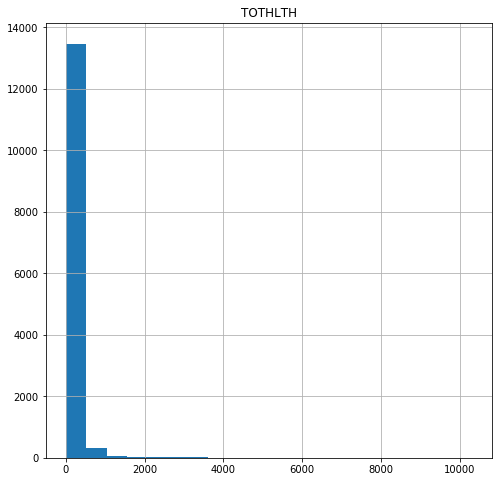

In [69]:

exp_hl.hist(figsize=(8,8), bins = 20)

Basic statistics

In [70]:

exp_hl.describe()

,TOTHLTH
count,13945.000000
mean,81.344815
std,306.943273
min,0.000000
25%,0.000000
50%,0.000000
75%,43.799999
max,10307.599609


In [71]:
b6 = pd.merge(basic_info2, exp_hl, how='inner', on='hid') # we are merging on the household id.

Average health expenditure across rural and urban households

          TOTHLTH
rururb           
Rural   69.823988
Urban   96.748396


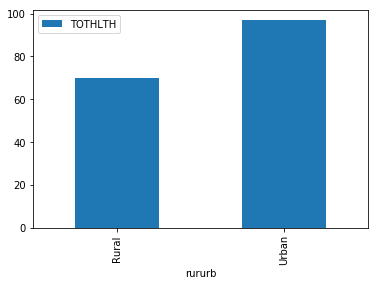

In [72]:
print(b6.groupby('rururb').mean())
b6.groupby('rururb').mean().plot(kind='bar')


Average health expenditure by region

                  TOTHLTH
region                   
Ashanti         64.405260
Brong Ahafo     38.292676
Central        106.760231
Eastern         96.958235
Greater Accra  114.826353
Northern        91.658408
Upper East      90.838214
Upper West      37.548463
Volta          112.310527
Western         62.207097


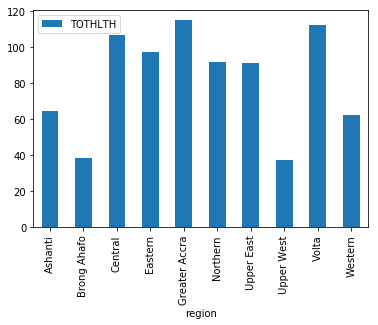

In [73]:

print(b6.groupby('region').mean())
b6.groupby('region').mean().plot(kind='bar')

#### Transport expenditure

In [74]:
exp_tr = pd.read_csv('07_GHA_EXPTRSP.csv')

checking missing values

In [77]:
exp_tr.isna().sum()

hid        0
TOTTRSP    0
dtype: int64

Distribution of health expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08d735c18>]],
      dtype=object)

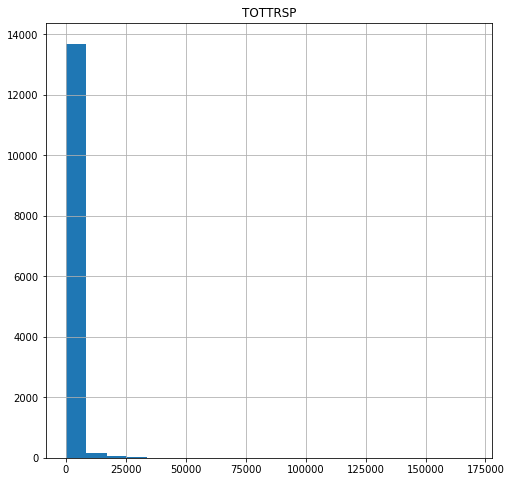

In [78]:
exp_tr.hist(figsize=(8,8), bins = 20)

Basic statistics

In [79]:
exp_tr.describe()

,TOTTRSP
count,13945.000000
mean,991.963825
std,3271.612768
min,0.000000
25%,22.500000
50%,292.000000
75%,913.500000
max,169320.000000


In [80]:
b7 = pd.merge(basic_info2, exp_tr, how='inner', on='hid') # we are merging on the household id.

Average health expenditure across rural and urban households

            TOTTRSP
rururb             
Rural    590.463920
Urban   1528.777339


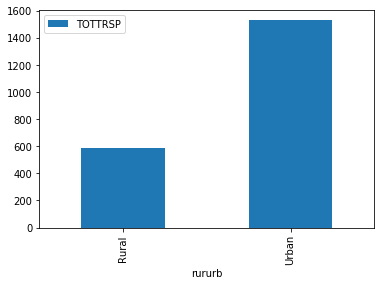

In [81]:
print(b7.groupby('rururb').mean())
b7.groupby('rururb').mean().plot(kind='bar')

Average health expenditure by region

                   TOTTRSP
region                    
Ashanti        1094.150279
Brong Ahafo     735.703835
Central         771.924392
Eastern         665.847930
Greater Accra  3388.471148
Northern        787.125118
Upper East      392.936627
Upper West      598.052835
Volta           699.905885
Western         713.225599


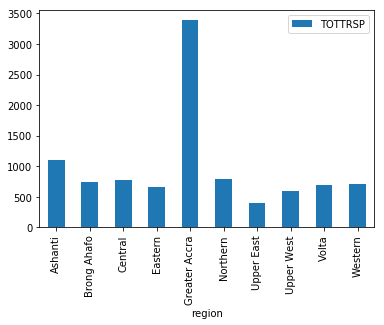

In [82]:
print(b7.groupby('region').mean())
b7.groupby('region').mean().plot(kind='bar')

Transport seems to be very expensive in Accra

#### Expenditure on communication

In [83]:
exp_cm = pd.read_csv('08_GHA_EXPCMNQ.csv')

checking missing values

In [84]:
exp_cm.isna().sum()

hid        0
TOTCMNQ    0
dtype: int64

Distribution of health expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08d4f7630>]],
      dtype=object)

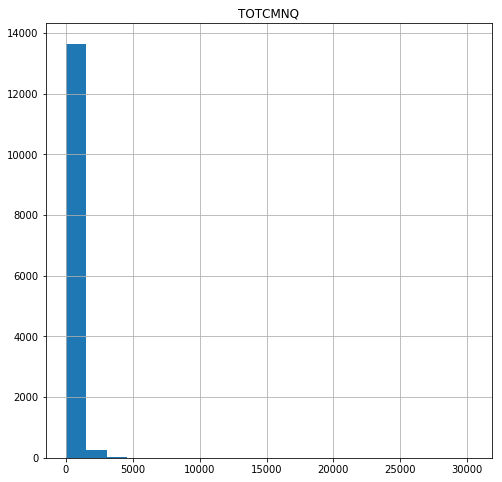

In [85]:
exp_cm.hist(figsize=(8,8), bins = 20)

Basic statistics

In [86]:
exp_cm.describe()

,TOTCMNQ
count,13945.000000
mean,286.174412
std,583.656567
min,0.000000
25%,15.000000
50%,119.699997
75%,374.500000
max,30352.000000


In [87]:
b8 = pd.merge(basic_info2, exp_cm, how='inner', on='hid') # we are merging on the household id.

Average health expenditure across rural and urban households

           TOTCMNQ
rururb            
Rural   172.259137
Urban   438.481446


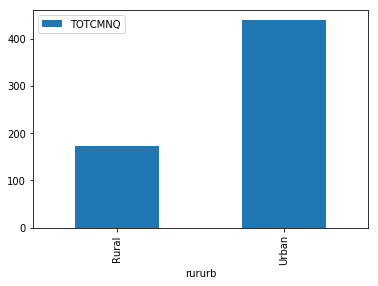

In [88]:
print(b8.groupby('rururb').mean())
b8.groupby('rururb').mean().plot(kind='bar')

In [ ]:
Average health expenditure by region

                  TOTCMNQ
region                   
Ashanti        267.403702
Brong Ahafo    364.913461
Central        324.662037
Eastern        296.575307
Greater Accra  712.177171
Northern       182.125202
Upper East     145.249729
Upper West      71.303971
Volta          198.309360
Western        307.703541


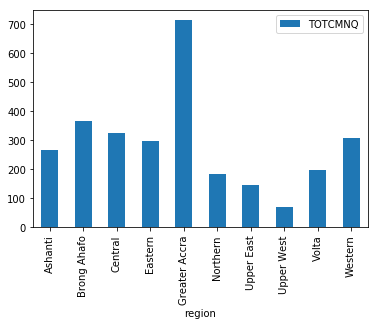

In [89]:
print(b8.groupby('region').mean())
b8.groupby('region').mean().plot(kind='bar')

#### Expenditure on recreation

In [91]:
exp_re = pd.read_csv('09_GHA_EXPRCRE.csv')

checking missing values

In [92]:
exp_re.isna().sum()

hid        0
TOTRCRE    0
dtype: int64

Distribution of recreation expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08d573860>]],
      dtype=object)

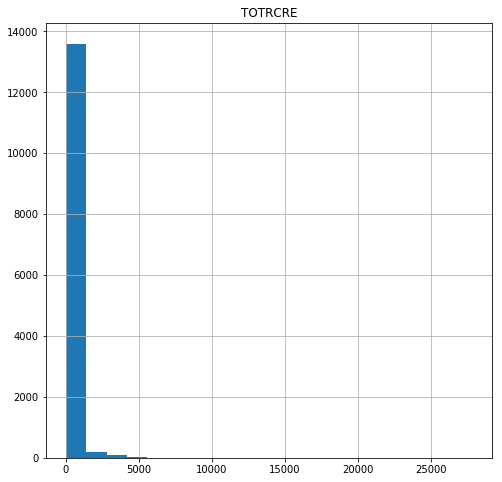

In [93]:
exp_re.hist(figsize=(8,8), bins = 20)

Basic statistics

In [94]:
exp_re.describe()

,TOTRCRE
count,13945.000000
mean,181.991894
std,643.390285
min,0.000000
25%,1.250000
50%,30.000000
75%,116.699997
max,27811.849609


In [95]:
b9 = pd.merge(basic_info2, exp_re, how='inner', on='hid') # we are merging on the household id.

Average recreation expenditure across rural and urban households

           TOTRCRE
rururb            
Rural   118.766397
Urban   266.525666


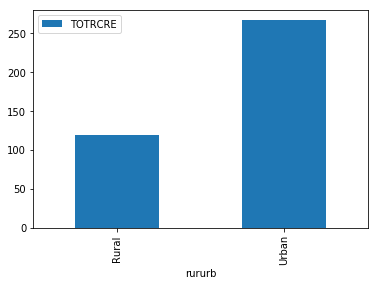

In [96]:
print(b9.groupby('rururb').mean())
b9.groupby('rururb').mean().plot(kind='bar')

Average recreation expenditure by region

                  TOTRCRE
region                   
Ashanti        178.414613
Brong Ahafo    127.015365
Central        263.639302
Eastern        148.074840
Greater Accra  406.356948
Northern        97.904880
Upper East     147.834096
Upper West     121.290298
Volta          145.519013
Western        186.619726


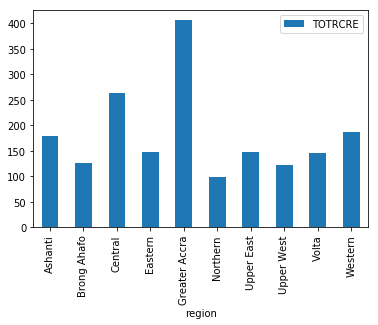

In [98]:
print(b9.groupby('region').mean())
b9.groupby('region').mean().plot(kind='bar')

#### Expenditure on education

In [99]:
exp_ed = pd.read_csv('10_GHA_EXPEDUC.csv')

checking missing values

In [100]:
exp_ed.isna().sum()

hid        0
TOTEDUC    0
dtype: int64

Distribution of education expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc08d0b2a20>]],
      dtype=object)

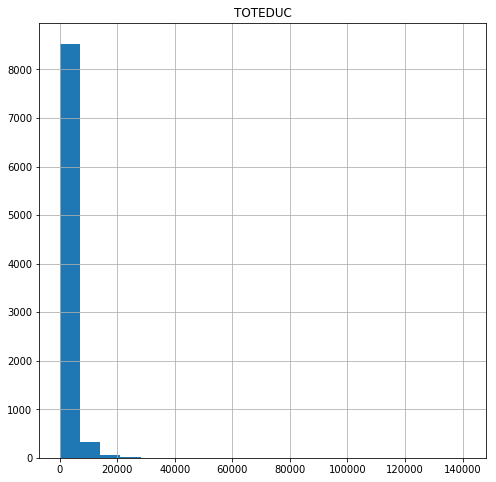

In [101]:
exp_ed.hist(figsize=(8,8), bins = 20)

Basic statistics

In [102]:
exp_ed.describe()

,TOTEDUC
count,8963.000000
mean,1946.815842
std,3961.876077
min,0.000000
25%,250.000000
50%,875.000000
75%,2295.500000
max,141000.000000


In [103]:
b10 = pd.merge(basic_info2, exp_ed, how='inner', on='hid') # we are merging on the household id.

Average education expenditure across rural and urban households

            TOTEDUC
rururb             
Rural   1191.202127
Urban   3080.341801


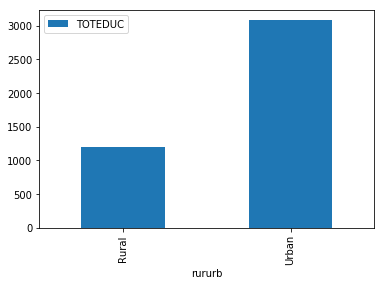

In [104]:
print(b10.groupby('rururb').mean())
b10.groupby('rururb').mean().plot(kind='bar')

Average education expenditure by region

                   TOTEDUC
region                    
Ashanti        2642.860491
Brong Ahafo    1798.522303
Central        2092.514828
Eastern        2013.046436
Greater Accra  5022.550146
Northern        827.770340
Upper East     1156.762695
Upper West      848.726100
Volta          1575.304493
Western        2306.566937


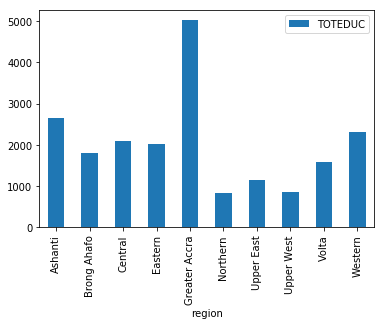

In [105]:
print(b10.groupby('region').mean())
b10.groupby('region').mean().plot(kind='bar')

#### Expenditure on Hotel and Restaurant

In [7]:
exp_ht = pd.read_csv('11_GHA_EXPHOTL.csv')

checking missing values

In [9]:
exp_ht.isna().sum()

hid        0
TOTHOTL    0
dtype: int64

Distribution of hotel and restaurant expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a0a2a470>]],
      dtype=object)

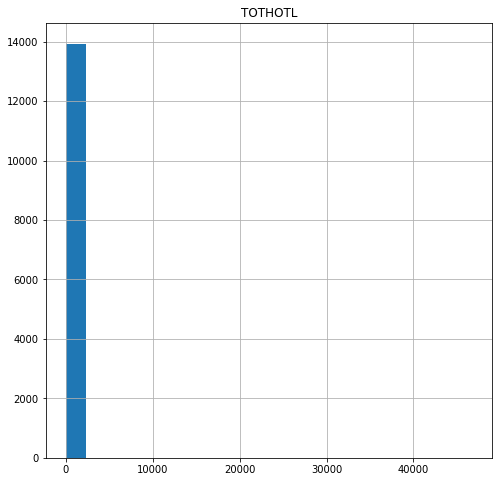

In [11]:
exp_ht.hist(figsize=(8,8), bins = 20)

Basic statistics

In [13]:
exp_ht.describe()

,TOTHOTL
count,13945.000000
mean,9.736945
std,429.394280
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,46720.000000


In [14]:
b11 = pd.merge(basic_info2, exp_ht, how='inner', on='hid') # we are merging on the household id.

Average hotel and restaurant expenditure across rural and urban households

          TOTHOTL
rururb           
Rural   10.042630
Urban    9.328239


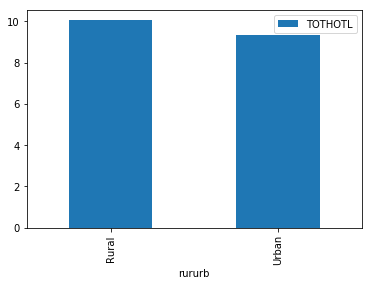

In [16]:
print(b11.groupby('rururb').mean())
b11.groupby('rururb').mean().plot(kind='bar')

Average hotel and restaurant expenditure by region

                 TOTHOTL
region                  
Ashanti         2.870127
Brong Ahafo     1.888889
Central        38.506784
Eastern         3.809834
Greater Accra  14.624185
Northern        4.673632
Upper East     20.303221
Upper West      2.916984
Volta           0.461054
Western        10.191945


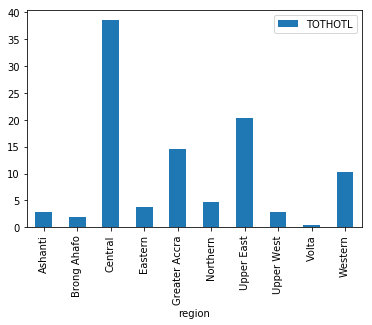

In [18]:
print(b11.groupby('region').mean())
b11.groupby('region').mean().plot(kind='bar')

#### Expenditure on miscellaneous goods

In [19]:
exp_mis = pd.read_csv('12_GHA_EXPMISC.csv')

checking missing values

In [20]:
exp_mis.isna().sum()

hid        0
TOTMISC    0
dtype: int64

Distribution of miscellaneous expenditure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a05e6d68>]],
      dtype=object)

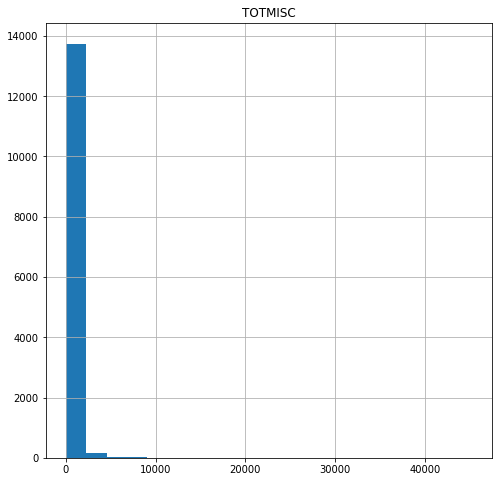

In [21]:
exp_mis.hist(figsize=(8,8), bins = 20)

Basic statistics

In [24]:
exp_mis.describe()

,TOTMISC
count,13945.000000
mean,294.109767
std,797.780548
min,0.000000
25%,0.000000
50%,102.199997
75%,306.600006
max,45235.601562


In [25]:
b12 = pd.merge(basic_info2, exp_mis, how='inner', on='hid') # we are merging on the household id.

Average miscellaneous expenditure across rural and urban households

           TOTMISC
rururb            
Rural   189.148445
Urban   434.445183


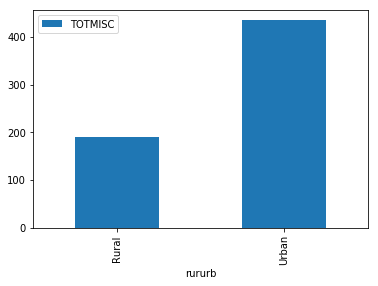

In [26]:
print(b12.groupby('rururb').mean())
b12.groupby('rururb').mean().plot(kind='bar')

Average miscellaneous expenditure by region


                  TOTMISC
region                   
Ashanti        393.865506
Brong Ahafo    166.867564
Central        431.949411
Eastern        411.874808
Greater Accra  472.507384
Northern       180.898369
Upper East     210.933573
Upper West      93.680629
Volta          262.550535
Western        289.505858


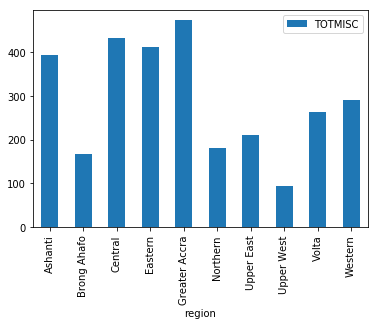

In [27]:
print(b12.groupby('region').mean())
b12.groupby('region').mean().plot(kind='bar')

### Conclusion

1. All variables are heavily skewed to the right. Thus, the variables appear to have outliers and hence the need to use clustering algorithms that are robust to outliers
2. All expenditure categories are relatively higher for urban households, except expenditure on alcohol. We will explore possible reasons behind this fiding in later stages of the project.
3. There were no missing values and hence no data point was dropped
4. There are no redundancy in the data
5. Some households reported zero expenditures for some categories, but that is true for poor households, especially those in the rural areas since most of them directly consume their farm produce

   In  a nutshell, we consider this dataset to be of good quality